In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

Library yang antara lain:
1. Pandas
2. Matplotlib
3. Numpy
4. Scikit-learn

In [93]:
# Input data train
dataTrain = pd.read_csv('./Penugasan_DMAI_24/train.csv')
print('Data Train Head:')
dataTrain.head()

Data Train Head:


,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
0,Betina,1.3125,1.0625,0.3625,22.665425,9.482908,5.925046,6.803880,15
1,Indeterminate,1.3250,0.9875,0.2875,13.466012,5.740774,2.863300,NaN,8
2,Jantan,1.1250,0.8000,0.2500,10.801160,4.833590,2.126212,3.260193,9
3,Indeterminate,1.3500,0.9750,0.3125,17.732612,7.158249,4.479221,5.386405,8
4,Betina,NaN,1.2875,0.4250,36.542505,17.009700,8.348928,9.397859,9


In [94]:
print('\nSummary:')
dataTrain.describe()


Summary:


,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
count,2678.000000,3342.000000,3259.000000,3342.000000,3342.000000,3342.000000,3108.000000,3342.000000
mean,1.312836,1.021993,0.350311,23.608657,10.197083,5.140463,6.847572,9.972472
std,0.300313,0.248532,0.106687,13.905232,6.247424,3.104521,3.985372,3.227272
min,0.275000,0.225000,0.000000,0.226796,0.070874,0.056699,0.085048,2.000000
25%,1.125000,0.875000,0.287500,12.686401,5.347424,2.668397,3.766940,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.567956,4.861939,6.697569,10.000000
75%,1.537500,1.212500,0.412500,32.867702,14.273973,7.229122,9.397859,11.000000
max,1.950000,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [95]:
print("Banyak data pada index yang null")
print("panjang :", dataTrain['Panjang'].isnull().sum(), "/", dataTrain['Panjang'].count())
print("diameter :", dataTrain['Diameter Cangkang'].isnull().sum(), "/", dataTrain['Diameter Cangkang'].count())
print("Tinggi : ", dataTrain['Tinggi'].isnull().sum(), "/", dataTrain['Tinggi'].count())
print("berat_daging_belum_dikupas :", dataTrain['Berat Daging Belum Dikupas'].isnull().sum(), "/", dataTrain['Berat Daging Belum Dikupas'].count())
print("berat_daging_udah_dikupas :", dataTrain['Berat Daging Udah Dikupas'].isnull().sum(), "/", dataTrain['Berat Daging Udah Dikupas'].count())
print("berat_organ_dalam :", dataTrain['Berat Organ Dalam'].isnull().sum(), "/", dataTrain['Berat Organ Dalam'].count())
print("berat_cangkang :", dataTrain['Berat Cangkang'].isnull().sum(), "/", dataTrain['Berat Cangkang'].count())
print("umur :", dataTrain['Umur Kerang'].isnull().sum(), "/", dataTrain['Umur Kerang'].count())

Banyak data pada index yang null
panjang : 664 / 2678
diameter : 0 / 3342
Tinggi :  83 / 3259
berat_daging_belum_dikupas : 0 / 3342
berat_daging_udah_dikupas : 0 / 3342
berat_organ_dalam : 0 / 3342
berat_cangkang : 234 / 3108
umur : 0 / 3342


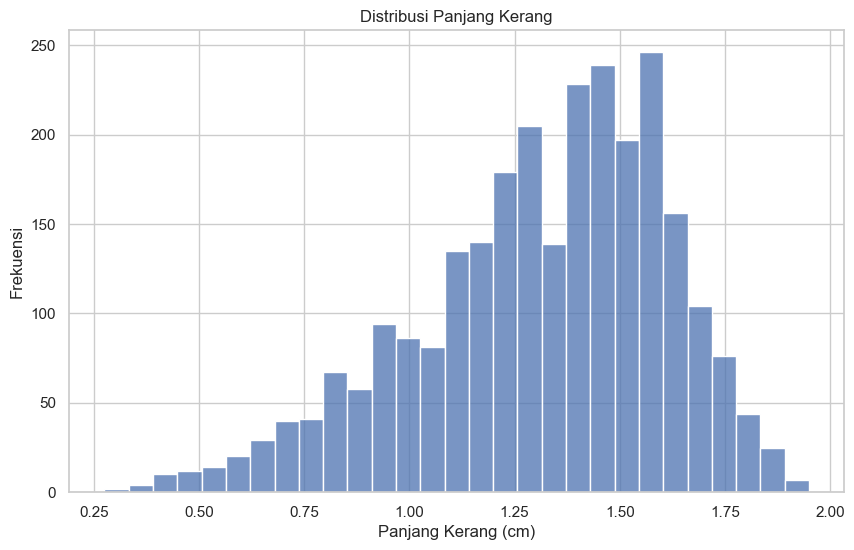

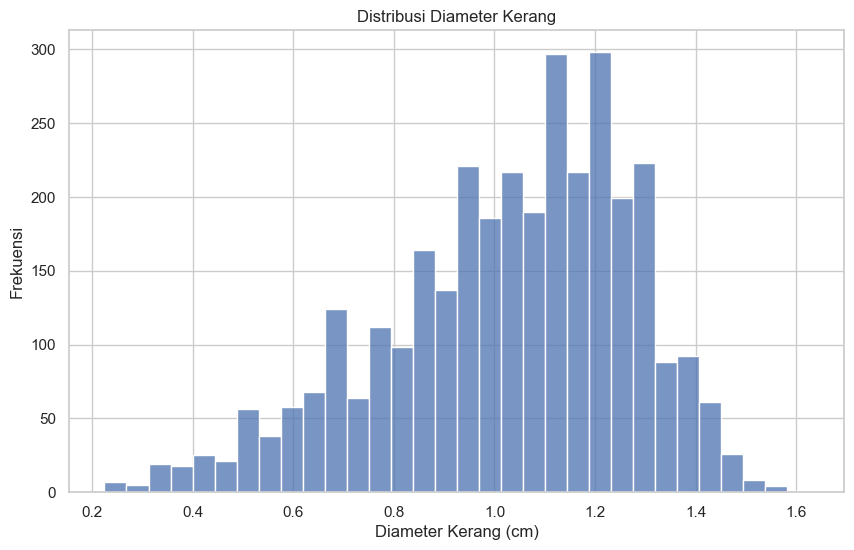

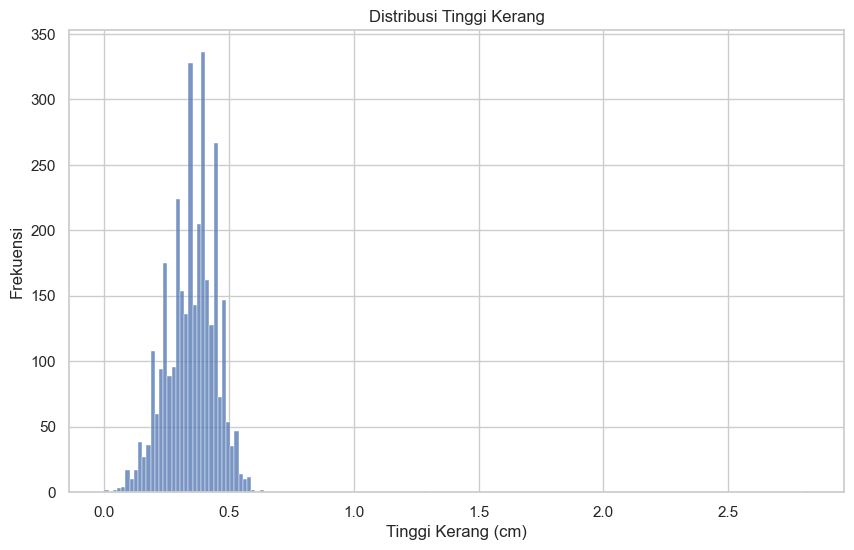

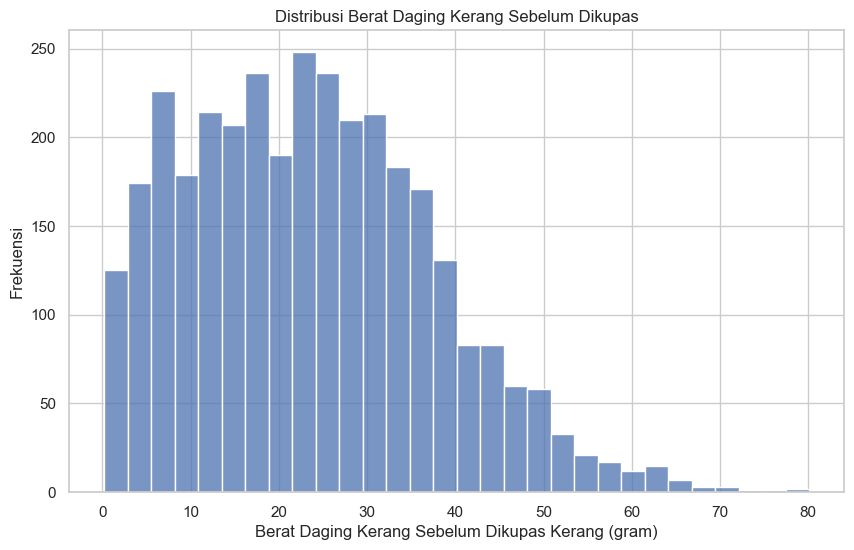

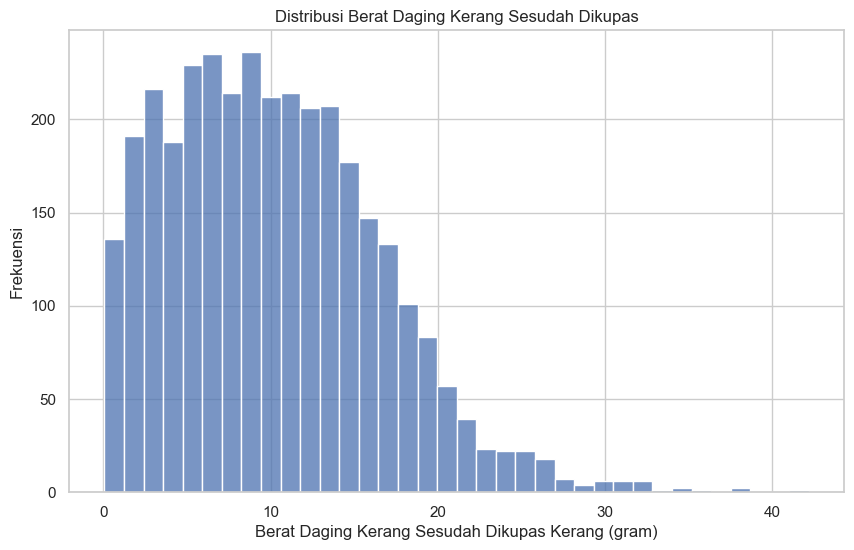

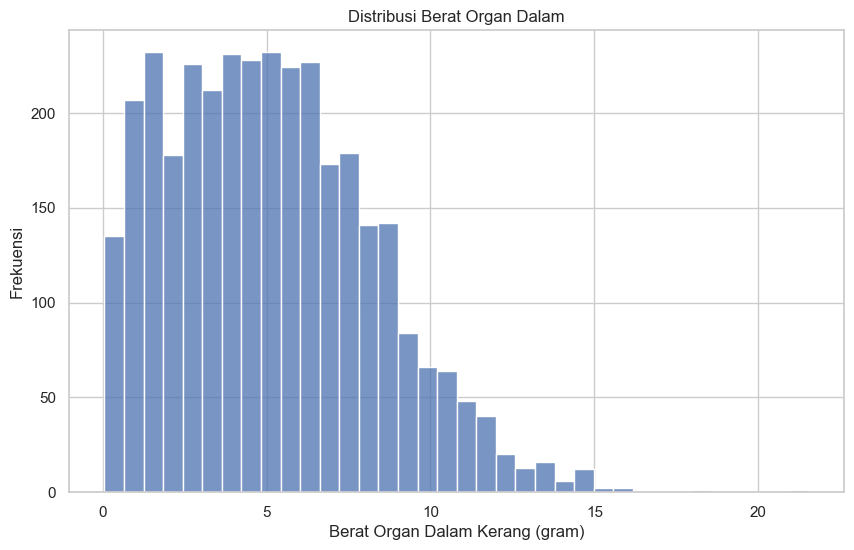

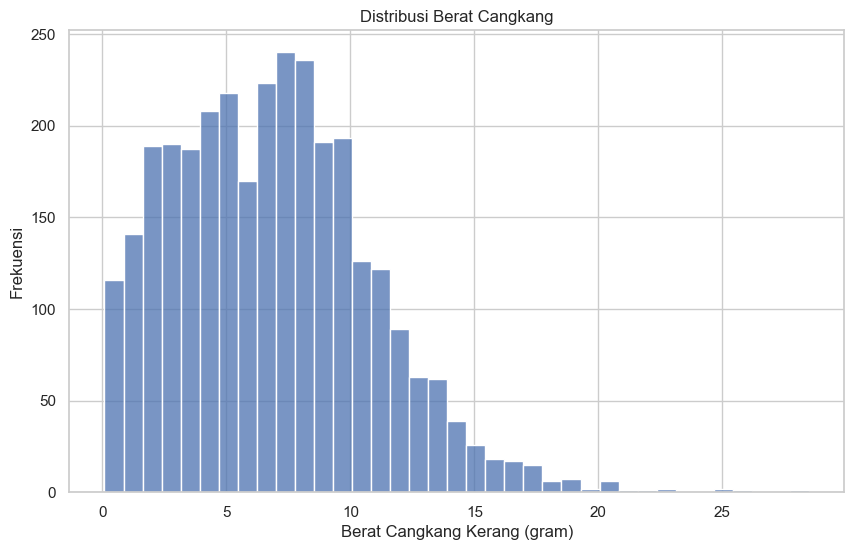

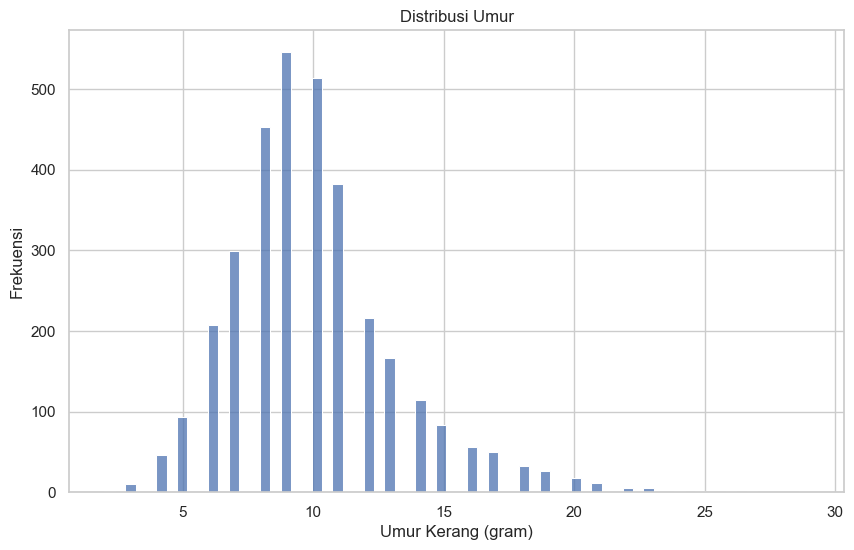

In [96]:
#Panjang Kerang
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Panjang'], kde=False)
plt.title('Distribusi Panjang Kerang')
plt.xlabel('Panjang Kerang (cm)')
plt.ylabel('Frekuensi')
plt.show()

# Diameter Kerang
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Diameter Cangkang'], kde=False)
plt.title('Distribusi Diameter Kerang')
plt.xlabel('Diameter Kerang (cm)')
plt.ylabel('Frekuensi')
plt.show()

# Tinggi Kerang
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Tinggi'], kde=False)
plt.title('Distribusi Tinggi Kerang')
plt.xlabel('Tinggi Kerang (cm)')
plt.ylabel('Frekuensi')
plt.show()

# Berang Daging Kerang Belum Dikupas
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Berat Daging Belum Dikupas'], kde=False)
plt.title('Distribusi Berat Daging Kerang Sebelum Dikupas')
plt.xlabel('Berat Daging Kerang Sebelum Dikupas Kerang (gram)')
plt.ylabel('Frekuensi')
plt.show()

# Berang Daging Kerang Udah Dikupas
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Berat Daging Udah Dikupas'], kde=False)
plt.title('Distribusi Berat Daging Kerang Sesudah Dikupas')
plt.xlabel('Berat Daging Kerang Sesudah Dikupas Kerang (gram)')
plt.ylabel('Frekuensi')
plt.show()

# Berat Organ Dalam
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Berat Organ Dalam'], kde=False)
plt.title('Distribusi Berat Organ Dalam')
plt.xlabel('Berat Organ Dalam Kerang (gram)')
plt.ylabel('Frekuensi')
plt.show()

# Berang Cangkas Kerang
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Berat Cangkang'], kde=False)
plt.title('Distribusi Berat Cangkang')
plt.xlabel('Berat Cangkang Kerang (gram)')
plt.ylabel('Frekuensi')
plt.show()

# Umur Kerang
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataTrain['Umur Kerang'], kde=False)
plt.title('Distribusi Umur')
plt.xlabel('Umur Kerang (gram)')
plt.ylabel('Frekuensi')
plt.show()

Grafik distribusi panjang dan diameter kerang memiliki distribusi yang mirip dengan kecondongan rata-rata data berada di sebelah kanan. Pada grafik distribusi berat daging sebelum dikupas, setelah dikupas, berat organ dalam, dan berat cangkang memiliki distribusi serta umur yang rata-rata data lebih condong ke kiri. Pada grafik tinggi kerang, distribusi yang terlihat seperti normal namun memiliki kurtosis yang sangat besar.

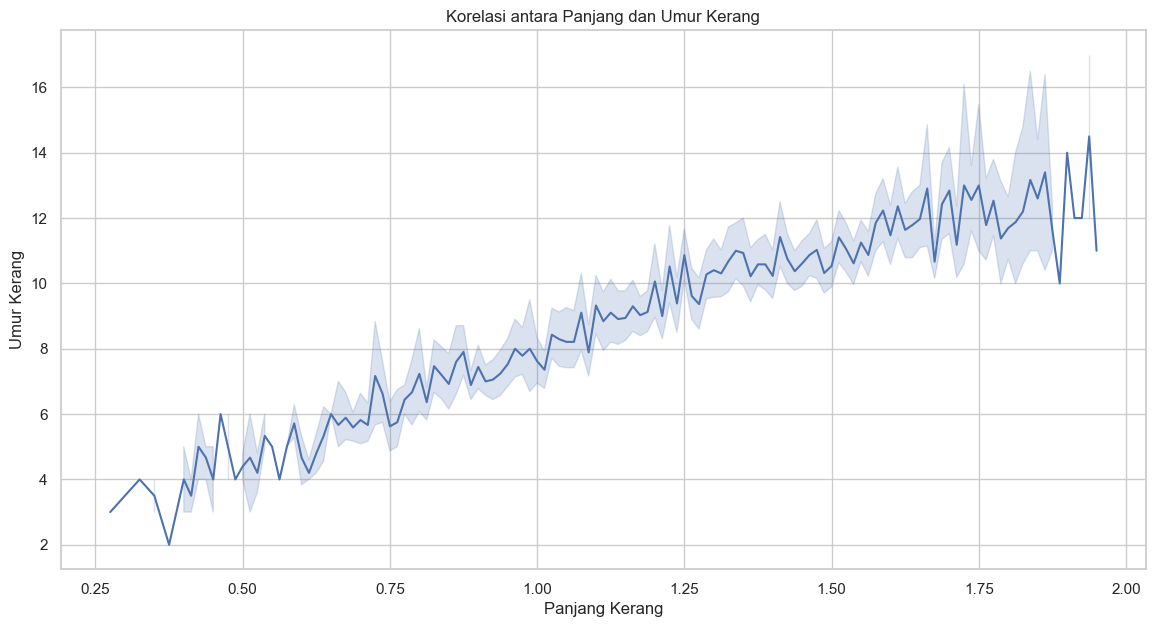

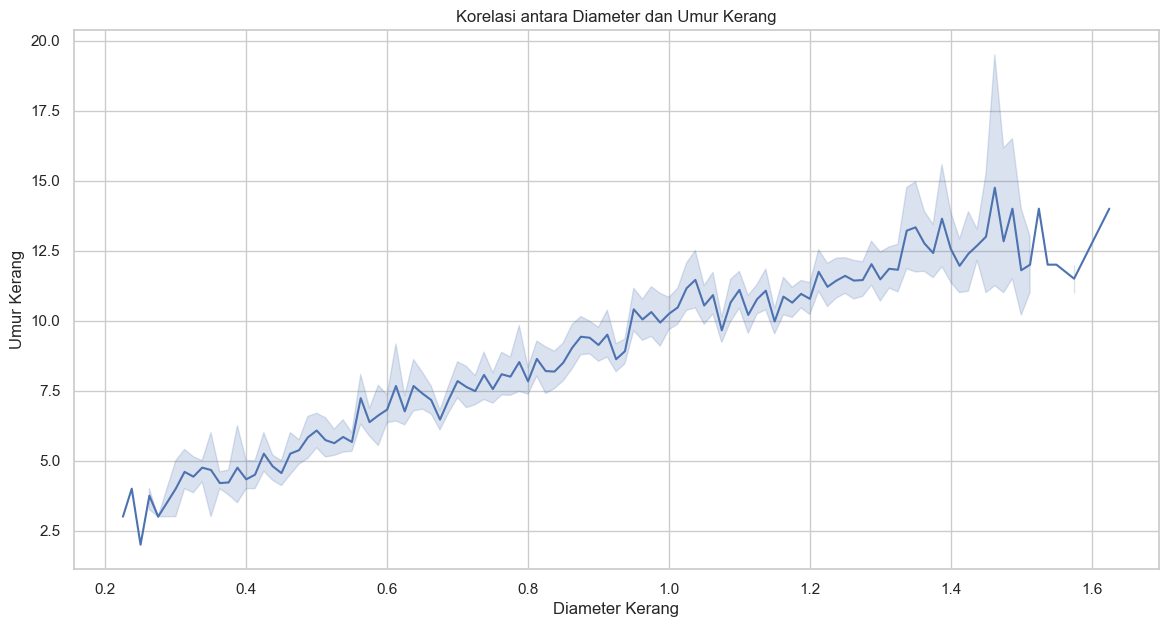

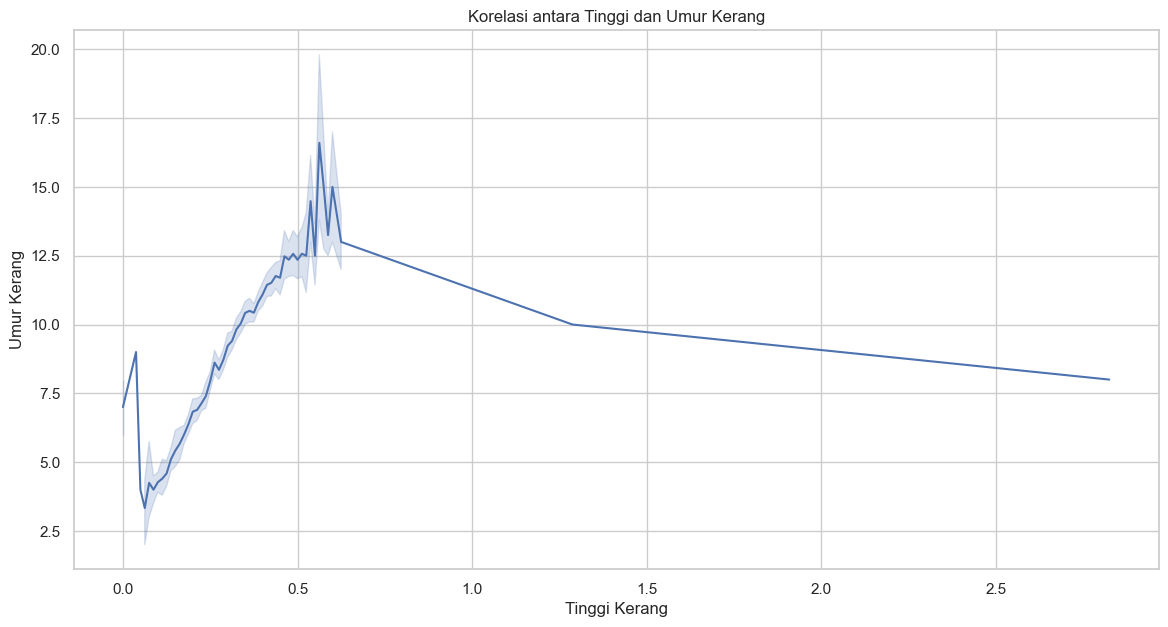

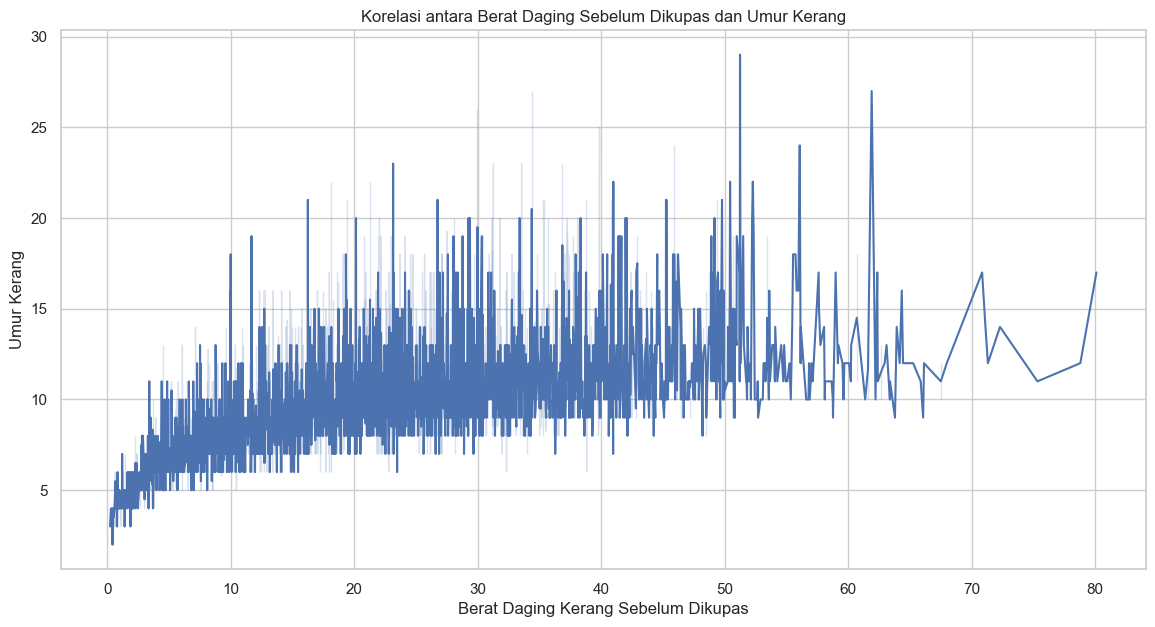

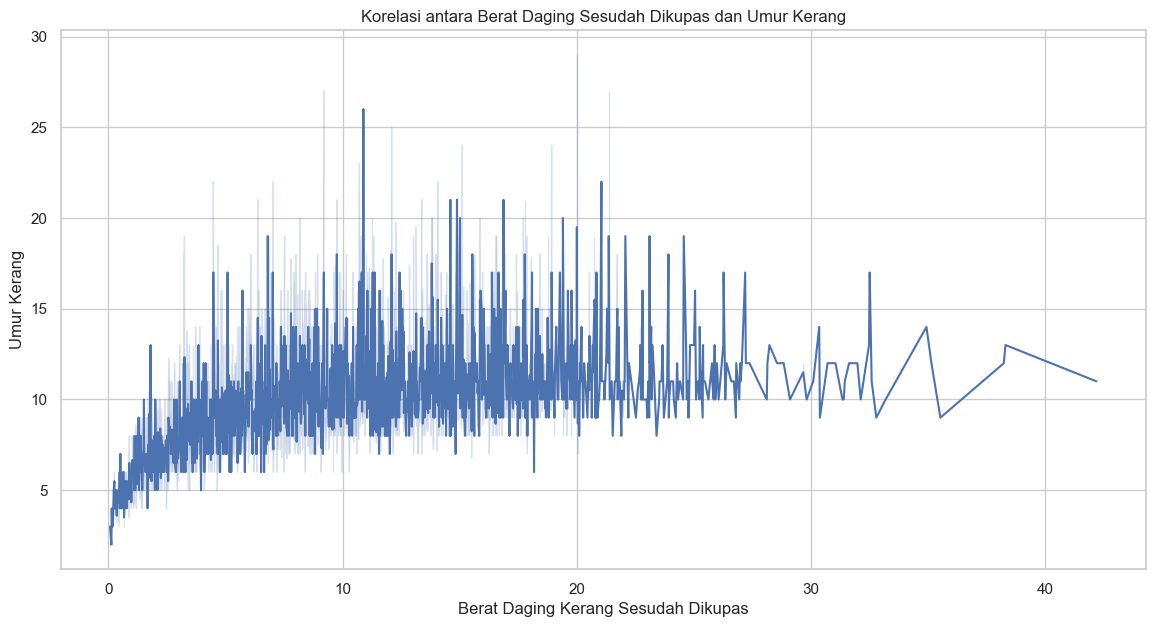

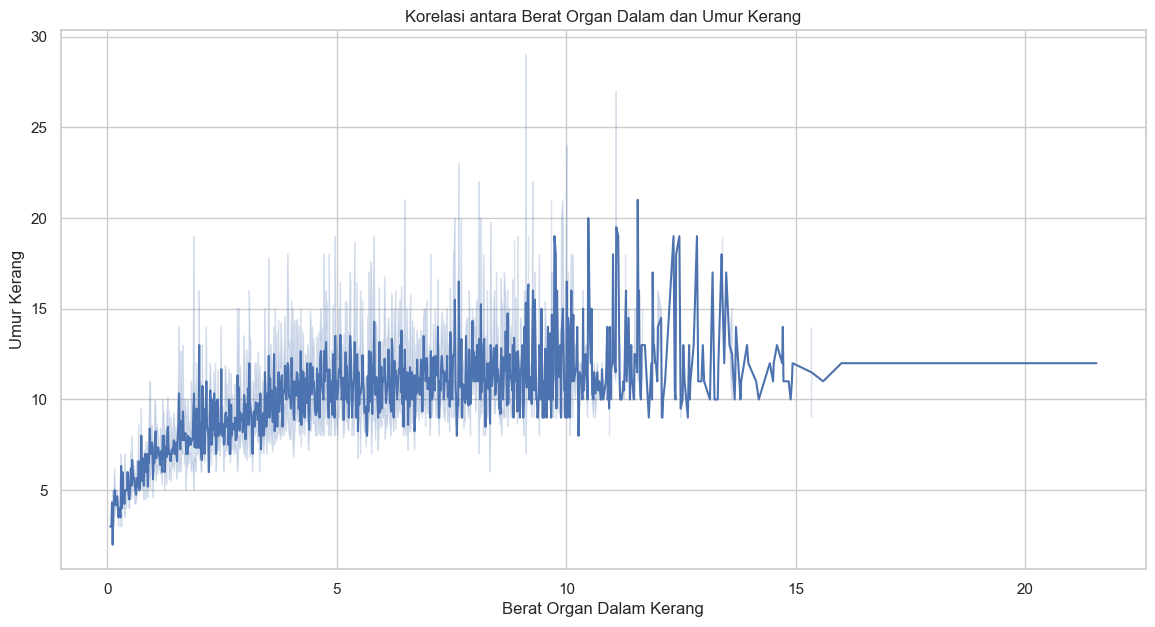

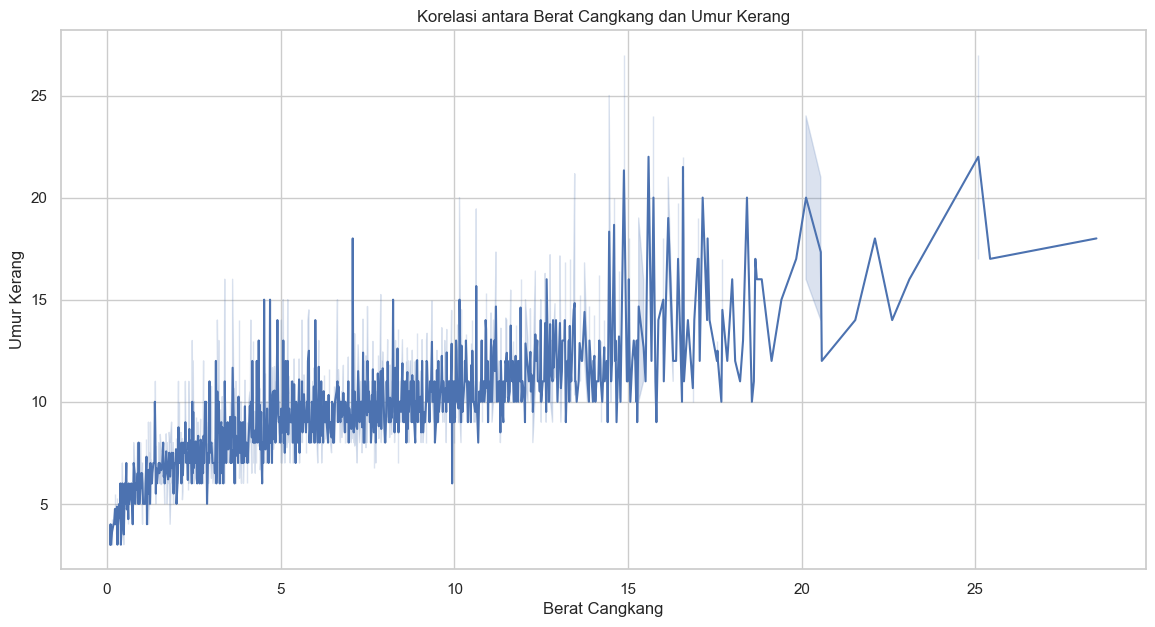

In [97]:
# Panjang
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Panjang'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Panjang dan Umur Kerang')
plt.xlabel('Panjang Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Diameter
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Diameter Cangkang'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Diameter dan Umur Kerang')
plt.xlabel('Diameter Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Tinggi
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Tinggi'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Tinggi dan Umur Kerang')
plt.xlabel('Tinggi Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Berat daging sebelum dikupas
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Berat Daging Belum Dikupas'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Berat Daging Sebelum Dikupas dan Umur Kerang')
plt.xlabel('Berat Daging Kerang Sebelum Dikupas')
plt.ylabel('Umur Kerang')
plt.show()

# Berat daging sesudah dikupas
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Berat Daging Udah Dikupas'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Berat Daging Sesudah Dikupas dan Umur Kerang')
plt.xlabel('Berat Daging Kerang Sesudah Dikupas')
plt.ylabel('Umur Kerang')
plt.show()

# Berat Organ Dalam
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Berat Organ Dalam'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Berat Organ Dalam dan Umur Kerang')
plt.xlabel('Berat Organ Dalam Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Berat Cangkang Kerang
plt.figure(figsize=(14, 7))
sns.lineplot(x=dataTrain['Berat Cangkang'], y=dataTrain['Umur Kerang'])
plt.title('Korelasi antara Berat Cangkang dan Umur Kerang')
plt.xlabel('Berat Cangkang')
plt.ylabel('Umur Kerang')
plt.show()



Pada grafik korelasi panjang dan diameter serta tinggi kerang terhadap umur kerang, grafik menunjukkan terjadi korelasi positif tetapi pada tinggi kerang korelasi tersebut lebih besar dan errornya pun lebih besar. Pada grafik korelasi berat daging sebelum dikupas, sesudah dikupas, organ dalam, dan berat cangkang juga menunjukkan korelasi positif. Namun, korelasi yang terjadi bukan linear melainkan logaritma diaman pada peningkatan berat terhadap umur cukup tinggi kemudian melandai.

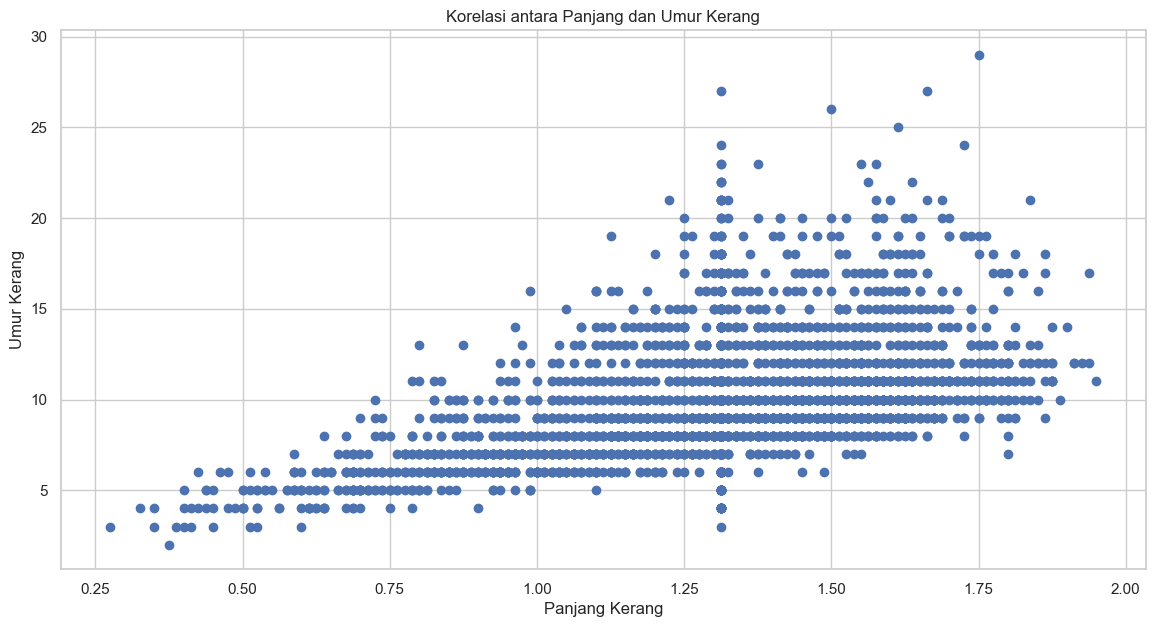

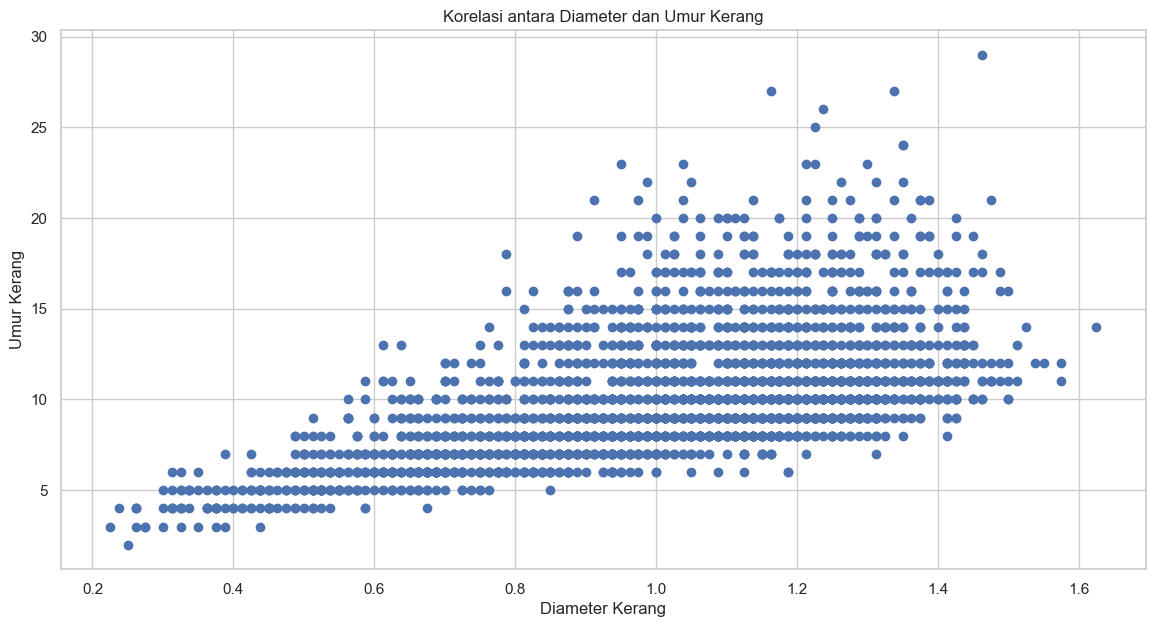

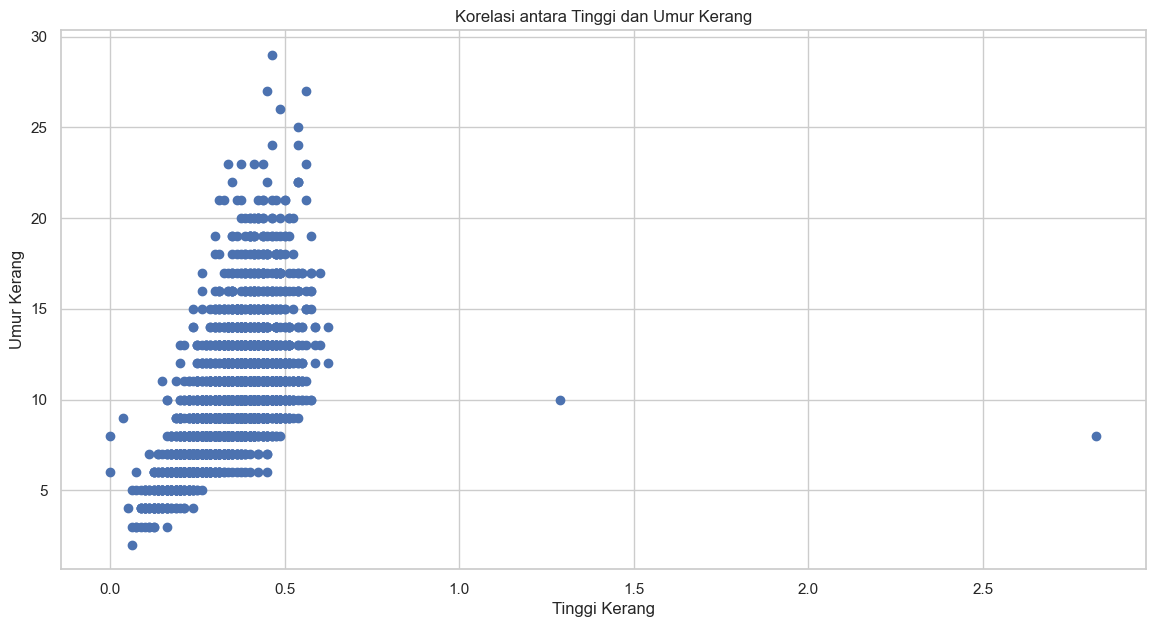

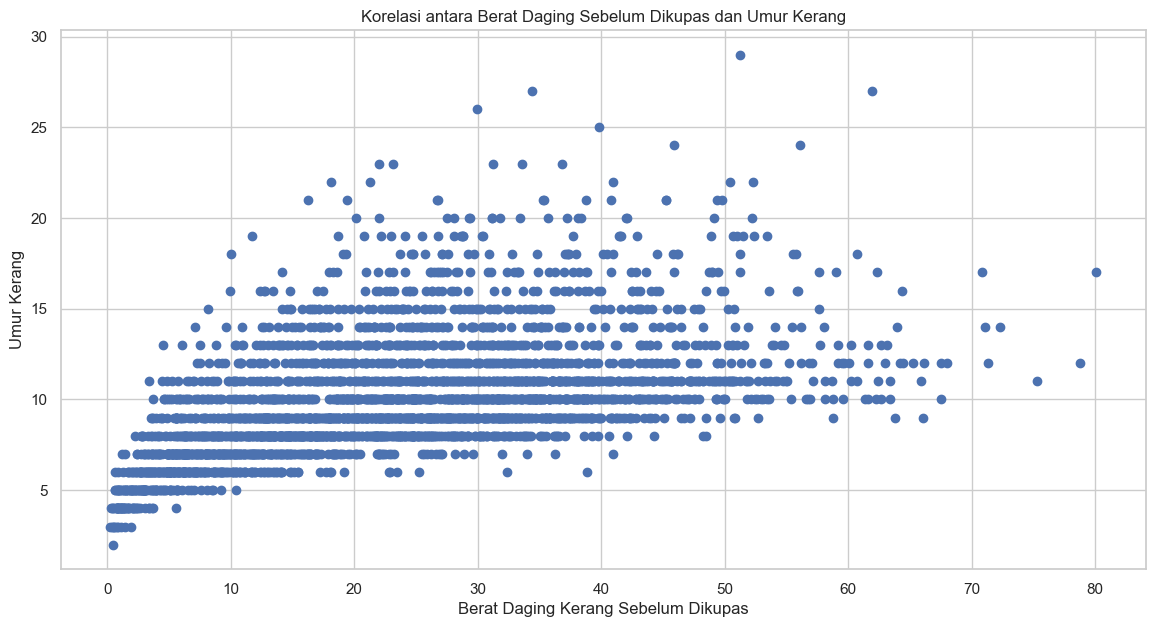

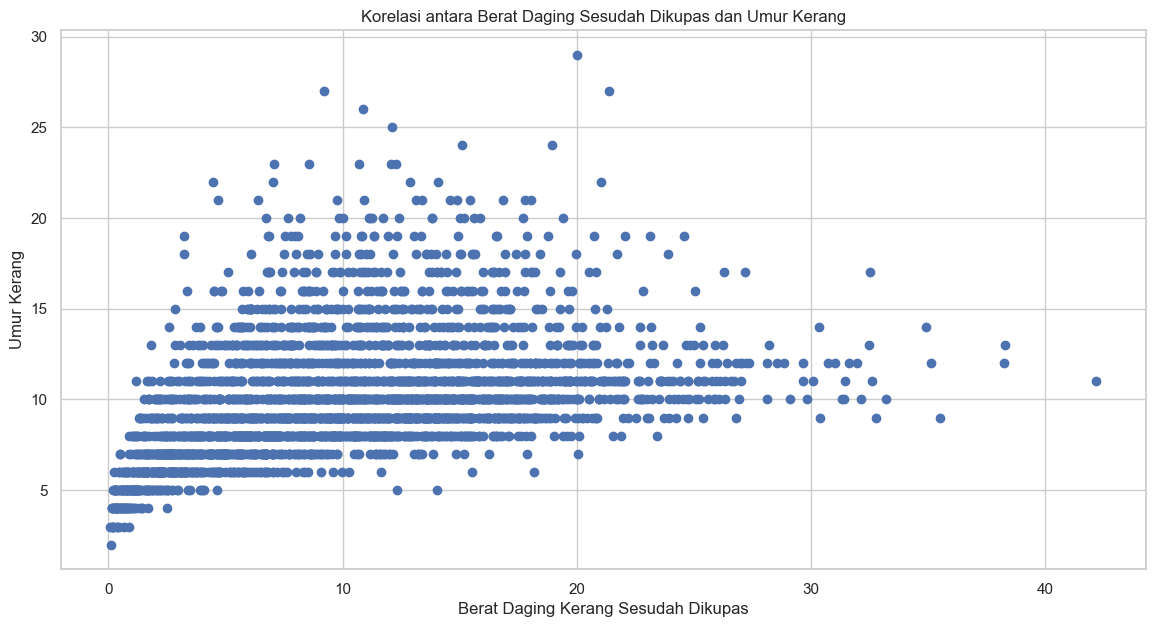

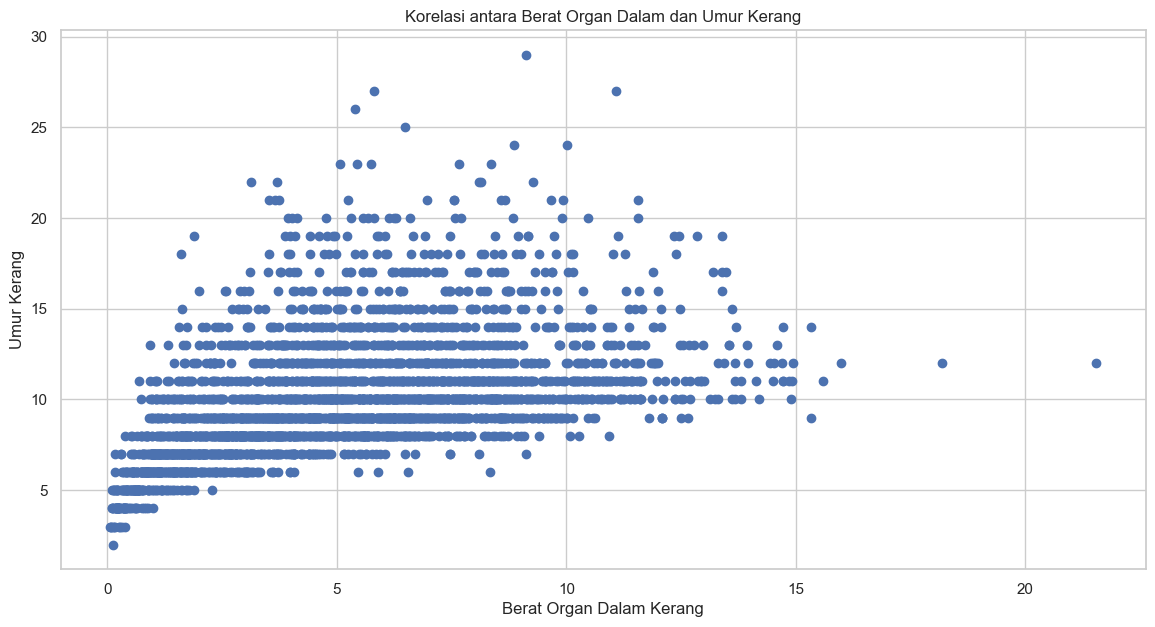

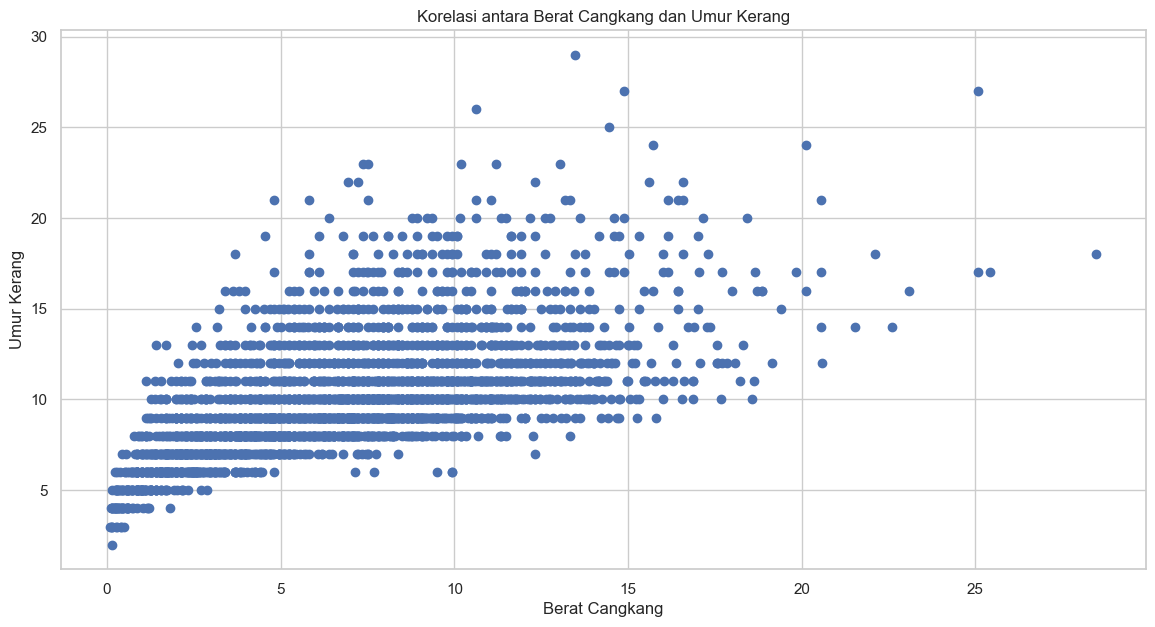

In [98]:
# Panjang
plt.figure(figsize=(14, 7))
plt.scatter(x=panjang, y=umur)
plt.title('Korelasi antara Panjang dan Umur Kerang')
plt.xlabel('Panjang Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Diameter
plt.figure(figsize=(14, 7))
plt.scatter(x=diameter, y=umur)
plt.title('Korelasi antara Diameter dan Umur Kerang')
plt.xlabel('Diameter Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Tinggi
plt.figure(figsize=(14, 7))
plt.scatter(x=tinggi, y=umur)
plt.title('Korelasi antara Tinggi dan Umur Kerang')
plt.xlabel('Tinggi Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Berat daging sebelum dikupas
plt.figure(figsize=(14, 7))
plt.scatter(x=berat_daging_belum_dikupas, y=umur)
plt.title('Korelasi antara Berat Daging Sebelum Dikupas dan Umur Kerang')
plt.xlabel('Berat Daging Kerang Sebelum Dikupas')
plt.ylabel('Umur Kerang')
plt.show()

# Berat daging sesudah dikupas
plt.figure(figsize=(14, 7))
plt.scatter(x=berat_daging_udah_dikupas, y=umur)
plt.title('Korelasi antara Berat Daging Sesudah Dikupas dan Umur Kerang')
plt.xlabel('Berat Daging Kerang Sesudah Dikupas')
plt.ylabel('Umur Kerang')
plt.show()

# Berat Organ Dalam
plt.figure(figsize=(14, 7))
plt.scatter(x=berat_organ_dalam, y=umur)
plt.title('Korelasi antara Berat Organ Dalam dan Umur Kerang')
plt.xlabel('Berat Organ Dalam Kerang')
plt.ylabel('Umur Kerang')
plt.show()

# Berat Cangkang Kerang
plt.figure(figsize=(14, 7))
plt.scatter(x=berat_cangkang, y=umur)
plt.title('Korelasi antara Berat Cangkang dan Umur Kerang')
plt.xlabel('Berat Cangkang')
plt.ylabel('Umur Kerang')
plt.show()

Pada grafik scatter plot, semua grafik menunjukkan mirip seperti grafik korelasi. Namun, terlihat hampir semua graffik scatterplot pada awalnya membentuk sebuah pola kemudian semakin besar semakin acak plot yang tercipta.

In [99]:
dataTrain['Panjang'] = dataTrain['Panjang'].fillna(dataTrain['Panjang'].mean(), inplace=False)
dataTrain['Tinggi'] = dataTrain['Tinggi'].fillna(dataTrain['Tinggi'].mean(), inplace=False)
dataTrain['Berat Cangkang'] = dataTrain['Berat Cangkang'].fillna(dataTrain['Berat Cangkang'].mean(), inplace=False)

print("Banyak data pada index yang null sesudah fill")
print("panjang :", dataTrain['Panjang'].isnull().sum(), "/", dataTrain['Panjang'].count())
print("diameter :", dataTrain['Diameter Cangkang'].isnull().sum(), "/", dataTrain['Diameter Cangkang'].count())
print("Tinggi : ", dataTrain['Tinggi'].isnull().sum(), "/", dataTrain['Tinggi'].count())
print("berat_daging_belum_dikupas :", dataTrain['Berat Daging Belum Dikupas'].isnull().sum(), "/", dataTrain['Berat Daging Belum Dikupas'].count())
print("berat_daging_udah_dikupas :", dataTrain['Berat Daging Udah Dikupas'].isnull().sum(), "/", dataTrain['Berat Daging Udah Dikupas'].count())
print("berat_organ_dalam :", dataTrain['Berat Organ Dalam'].isnull().sum(), "/", dataTrain['Berat Organ Dalam'].count())
print("berat_cangkang :", dataTrain['Berat Cangkang'].isnull().sum(), "/", dataTrain['Berat Cangkang'].count())
print("umur :", dataTrain['Umur Kerang'].isnull().sum(), "/", dataTrain['Umur Kerang'].count())


Banyak data pada index yang null sesudah fill
panjang : 0 / 3342
diameter : 0 / 3342
Tinggi :  0 / 3342
berat_daging_belum_dikupas : 0 / 3342
berat_daging_udah_dikupas : 0 / 3342
berat_organ_dalam : 0 / 3342
berat_cangkang : 0 / 3342
umur : 0 / 3342


In [100]:
# Memisahkan fitur (X) dan target (y)
X = dataTrain[['Panjang', 'Diameter Cangkang', 'Tinggi', 'Berat Daging Belum Dikupas', 'Berat Daging Udah Dikupas', 'Berat Organ Dalam', 'Berat Cangkang']]
y = dataTrain['Umur Kerang']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
dataTrain_model = LinearRegression()
dataTrain_model.fit(train_X, train_y)
pred_y = dataTrain_model.predict(val_X)

In [101]:
print('Bentuk Model:')
print("slope : ", dataTrain_model.coef_)
print("Intercept :" , dataTrain_model.intercept_)
print("\nPrediksinya yaitu:", pred_y.tolist())
print("Data asli:", val_y.tolist())
print("MAE : ", mean_absolute_error(val_y, pred_y))
print("Koeffisien Determinasi", dataTrain_model.score(train_X,train_y))
np
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(val_y, pred_y)))

Bentuk Model:
slope :  [-0.18188545  5.03980202  8.93231037  0.37206445 -0.74402845 -0.36711078
  0.07798576]
Intercept : 2.1257952499573367

Prediksinya yaitu: [8.081366616549703, 5.5667962882496695, 12.040387155890677, 13.812407949043054, 9.559966267134795, 11.069132602679945, 9.6129374566238, 9.935359320851228, 9.490567074416521, 8.961067552561662, 16.91103065451691, 8.263998654599664, 9.411680259185687, 10.0302777586865, 11.307490600652336, 8.406905494260837, 10.186656454612528, 9.765327542283758, 11.977433680750279, 12.670245600516614, 12.109874743044395, 9.322277012957596, 8.530751749493097, 9.381740676436415, 9.552976450232572, 6.462382407651257, 11.97241888881565, 11.394701656470597, 10.855030762539503, 9.232444680615975, 7.990386060660968, 14.634198529856002, 10.925406190942505, 16.194558008883448, 11.946857542076243, 7.401752270493601, 10.553254960735709, 11.312915920361256, 10.62004763628309, 7.8905565608183945, 5.689393886715691, 6.142804988128158, 5.035441580107232, 13.245

Dari hasil regresi linear, diketahui bentuk model untuk mengetahui umur kerang yaitu y = 2.126 - 0.182x1 + 5.040x2 + 8.932x3 + 0.372x4 - 0.744x5 - 0.367x6 + 0.078x7.
- y = umur kerang
- x1 = panjang kerang
- x2 = diameter kerang
- x3 = tinggi kerang
- x4 = berat daging sebelum dikupas
- x5 = berat daging setelah dikupas
- x6 = berat organ dalam
- x7 = berat cangkang


In [102]:
dataTest = pd.read_csv('./Penugasan_DMAI_24/test.csv')
dataTest

,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang
0,Indeterminate,0.7750,0.5875,0.1750,4.280774,1.786018,1.148155,1.275727
1,Jantan,1.1625,0.8875,0.3000,15.067759,7.725239,2.749901,3.954755
2,Betina,1.0875,0.8750,0.3000,12.998246,5.443104,2.834950,3.685435
3,Indeterminate,1.3500,0.9875,0.3375,18.583097,7.668540,4.394172,5.443104
4,Indeterminate,0.8250,0.6000,0.1875,4.620969,2.112038,0.935534,1.360776
...,...,...,...,...,...,...,...,...
546,Jantan,1.4625,1.1250,0.4375,31.964061,13.962129,7.427569,9.497082
547,Jantan,1.2750,1.0250,0.3875,36.358234,16.130865,8.249704,10.758635
548,Jantan,0.7375,0.5375,0.1875,3.657085,1.417475,0.836310,1.133980
549,Betina,1.2500,0.9375,0.2875,16.853778,5.244657,4.195726,5.386405


In [103]:
X_test = dataTest[['Panjang', 'Diameter Cangkang', 'Tinggi', 'Berat Daging Belum Dikupas', 'Berat Daging Udah Dikupas', 'Berat Organ Dalam', 'Berat Cangkang']]
y_test = dataTrain_model.predict(X_test)
print("Hasil test:", y_test.tolist())

Hasil test: [6.4507360732373495, 8.224147137337862, 9.050546426916119, 9.891543842573611, 6.584987827329022, 15.491738649531985, 10.98638049157701, 12.637528704869913, 9.679896948739032, 7.674301453768727, 10.234979052615904, 12.226873946700737, 5.73178003102575, 12.406057775762317, 11.651875388572341, 9.279753249714178, 12.374841259139378, 3.8514373944927236, 9.243226992973112, 12.688712556342102, 9.94777844947169, 12.034942149283193, 6.293430532865367, 11.202111321317883, 8.969333331962899, 10.67234698278409, 11.40551437826176, 8.69492673900808, 17.347883963995393, 7.819933953280135, 5.972332856262726, 13.485526644180068, 4.005970777018506, 9.569422598936919, 8.052850295598999, 9.1419446191281, 11.873358200635264, 11.189654469599784, 7.846163231057316, 10.397270843037957, 9.785565081606173, 8.396608385102684, 12.462204726532429, 8.924037568140934, 14.541125076203015, 11.013251416466565, 10.080581698561378, 7.179814945312571, 9.328499144498348, 9.759811603720026, 8.852985814791507, 9.

In [104]:
# Rewrite file sample submission dengan data hasil test
dataSubmission = pd.read_csv('./Penugasan_DMAI_24/sample_submission.csv')
dataSubmission = pd.DataFrame(y_test, columns=['Umur Kerang'])
dataSubmission.set_index('Umur Kerang')
dataSubmission.to_csv('./Penugasan_DMAI_24/sample_submission.csv',index=False)